In [2]:
import pandas as pd

In [25]:
df_tran = pd.read_csv('./dataset/tran.txt',names=['primary-date','time','approximate-indicator','secondary-date','approximate-indicator',
  'transaction-ID','player','type','from-team','from-league',
  'to-team',
  'to-league',
  'draft-type',
  'draft-round',
  'pick-number',
  'info'])
df_playerid = pd.read_csv('./dataset/playerid_list.csv',names=['LASTNAME','FIRSTNAME','PLAYERID','DAVENPORTCODE','MLBCODE','player'],skiprows=1)
df_master = pd.read_csv('./dataset/Master.csv')
df_batting = pd.read_csv('./dataset/Batting.csv')
df_pitching = pd.read_csv('./dataset/Pitching.csv')
df_fielding = pd.read_csv('./dataset/Fielding.csv')
df_team_names = pd.read_csv('./dataset/TeamsFranchises.csv')

In [70]:
df_team_names['franchID'][0]
#x = df_team_names.loc[df_team_names['franchID'] == 'ALT']['franchName']
#print list(x)[0]
def findteamname(x):
    idx = df_team_names.loc[df_team_names['franchID'] == x]['franchName']
    if(idx.size>0):
        return list(idx)[0]
    else:
        return ""
#print findteamname('ALT')

In [10]:
#print df_tran.head(5)
#df_tran.to_csv('tran_sample.csv')
print df_tran['from-team'].nunique()
df_tran1 = df_tran.groupby('from-team', sort=False).filter(lambda x: len(x) > 0, dropna=True)
df_tran2 = df_tran.groupby('to-team', sort=False).filter(lambda x: len(x) > 0, dropna=True)
#print df_tran2.head
team_set = set(df_tran['from-team'])
#print team_set

#from collections import Counter
#print Counter(df_tran['from-team'])
#print Counter(df_tran['to-team'])

count_list = []
for x in team_set:
    #print "Total count: ", x, list(df_tran['from-team']).count(x)  + list(df_tran['to-team']).count(x)
    count_list.append((x,list(df_tran['from-team']).count(x)  + list(df_tran['to-team']).count(x)))

534


In [83]:
count_list_sorted = sorted(count_list, key=lambda tup: tup[1], reverse=True)
#count_list_sorted

#display(count_list_sorted)

df_temp = pd.DataFrame(count_list_sorted)
#df_temp.pivot(index=0, columns=1, values=2)
df_temp

,0,1
0,NaN,54958
1,NYA,4924
2,CHN,4714
3,CIN,4674
4,CLE,4617
5,BOS,4581
6,SLN,4577
7,PIT,4568
8,PHI,4534
9,CHA,4171


In [6]:
df_tran3 = df_tran.groupby(['from-team','to-team']).filter(lambda x: len(x) > 0, dropna=True)

In [73]:
#df_tran3.count()
#df_tran3
df_tran3 = df_tran.groupby(['from-team','to-team']).size().reset_index().rename(columns={0:'count'})
#print df_tran3#, df_tran3.dtypes
#df_tran3_sorted = sorted(df_tran3, key=lambda tup: tup[3], reverse=True)
#print df_tran3_sorted

#df_tran3.groupby(['from-team'], sort=False)['count'].max()
idx = df_tran3.groupby(['from-team'])['count'].transform(max) == df_tran3['count']
temp = df_tran3[idx]

temp1 = temp.sort(['count'], ascending=[0])
#print temp1

from IPython.display import display, HTML
#display(temp1)

temp1['from-team-name'] = temp1['from-team'].apply(lambda x: findteamname(str(x)))
temp1['to-team-name'] = temp1['to-team'].apply(lambda x: findteamname(str(x)))

#print temp1

display(temp1)

/home/piyush/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:12: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,from-team,to-team,count,from-team-name,to-team-name
3277,SLN,PHI,108,,Philadelphia Phillies
3240,SLN,CIN,108,,Cincinnati Reds
907,CIN,SLN,103,Cincinnati Reds,
2772,PHI,SLN,102,Philadelphia Phillies,
816,CHN,SLN,91,,
262,BOS,CLE,86,Boston Red Sox,Cleveland Indians
2870,PIT,SLN,84,Pittsburgh Pirates,
950,CLE,BOS,78,Cleveland Indians,Boston Red Sox
2247,NY1,BSN,76,,
2322,NYA,CHA,71,,


In [ ]:
for x in team_set:
    max(df_tran3['count'])

In [27]:
df_master.head(5)
df_master['playerID'].nunique()

18846

In [29]:
df_batting.groupby('playerID')
df_batting.head(15)
#df_batting['playerID'].nunique()
df_batting['playerID'].count()

101332

In [32]:
df_pitching.groupby('playerID')
df_pitching.head(15)
#df_pitching['playerID'].nunique()
df_pitching['playerID'].count()

44139

In [35]:
df_fielding.groupby('playerID')
df_fielding.head(15)
df_fielding['playerID'].count()

170526

In [37]:
df_tran['type'].count()

85144

In [5]:
df_tran = df_tran[df_tran['type'] == "T "]

In [6]:
df_tran['transaction-ID'].nunique()

6061

In [8]:
import networkx as nx
import operator
G =nx.Graph()
for index, row in df_trade.iterrows():
    G.add_edge(row['from-team'] ,row['to-team']) 

NameError: name 'df_trade' is not defined

{'ANA': <matplotlib.text.Text at 0x7f6e38ce6710>,
 'ARI': <matplotlib.text.Text at 0x7f6e38d74898>,
 'ATL': <matplotlib.text.Text at 0x7f6e3a6e4898>,
 'Albany': <matplotlib.text.Text at 0x7f6e3a606390>,
 'Atlanta': <matplotlib.text.Text at 0x7f6e3a643ba8>,
 'BAL': <matplotlib.text.Text at 0x7f6e38d6a438>,
 'BL2': <matplotlib.text.Text at 0x7f6e3a606f98>,
 'BLF': <matplotlib.text.Text at 0x7f6e38d76128>,
 'BLN': <matplotlib.text.Text at 0x7f6e38d765c0>,
 'BOS': <matplotlib.text.Text at 0x7f6e38d859b0>,
 'BRO': <matplotlib.text.Text at 0x7f6e6d987c18>,
 'BS2': <matplotlib.text.Text at 0x7f6e38d6c1d0>,
 'BSN': <matplotlib.text.Text at 0x7f6e38d8f710>,
 'Baltimore': <matplotlib.text.Text at 0x7f6e3a6e3438>,
 'Beaumont': <matplotlib.text.Text at 0x7f6e6d97b550>,
 'Birmingham': <matplotlib.text.Text at 0x7f6e38d807b8>,
 'Bridgeport': <matplotlib.text.Text at 0x7f6e38c5c128>,
 'Brockton': <matplotlib.text.Text at 0x7f6e38ce0828>,
 'Buffalo': <matplotlib.text.Text at 0x7f6e6d99e6d8>,
 'CAL': <

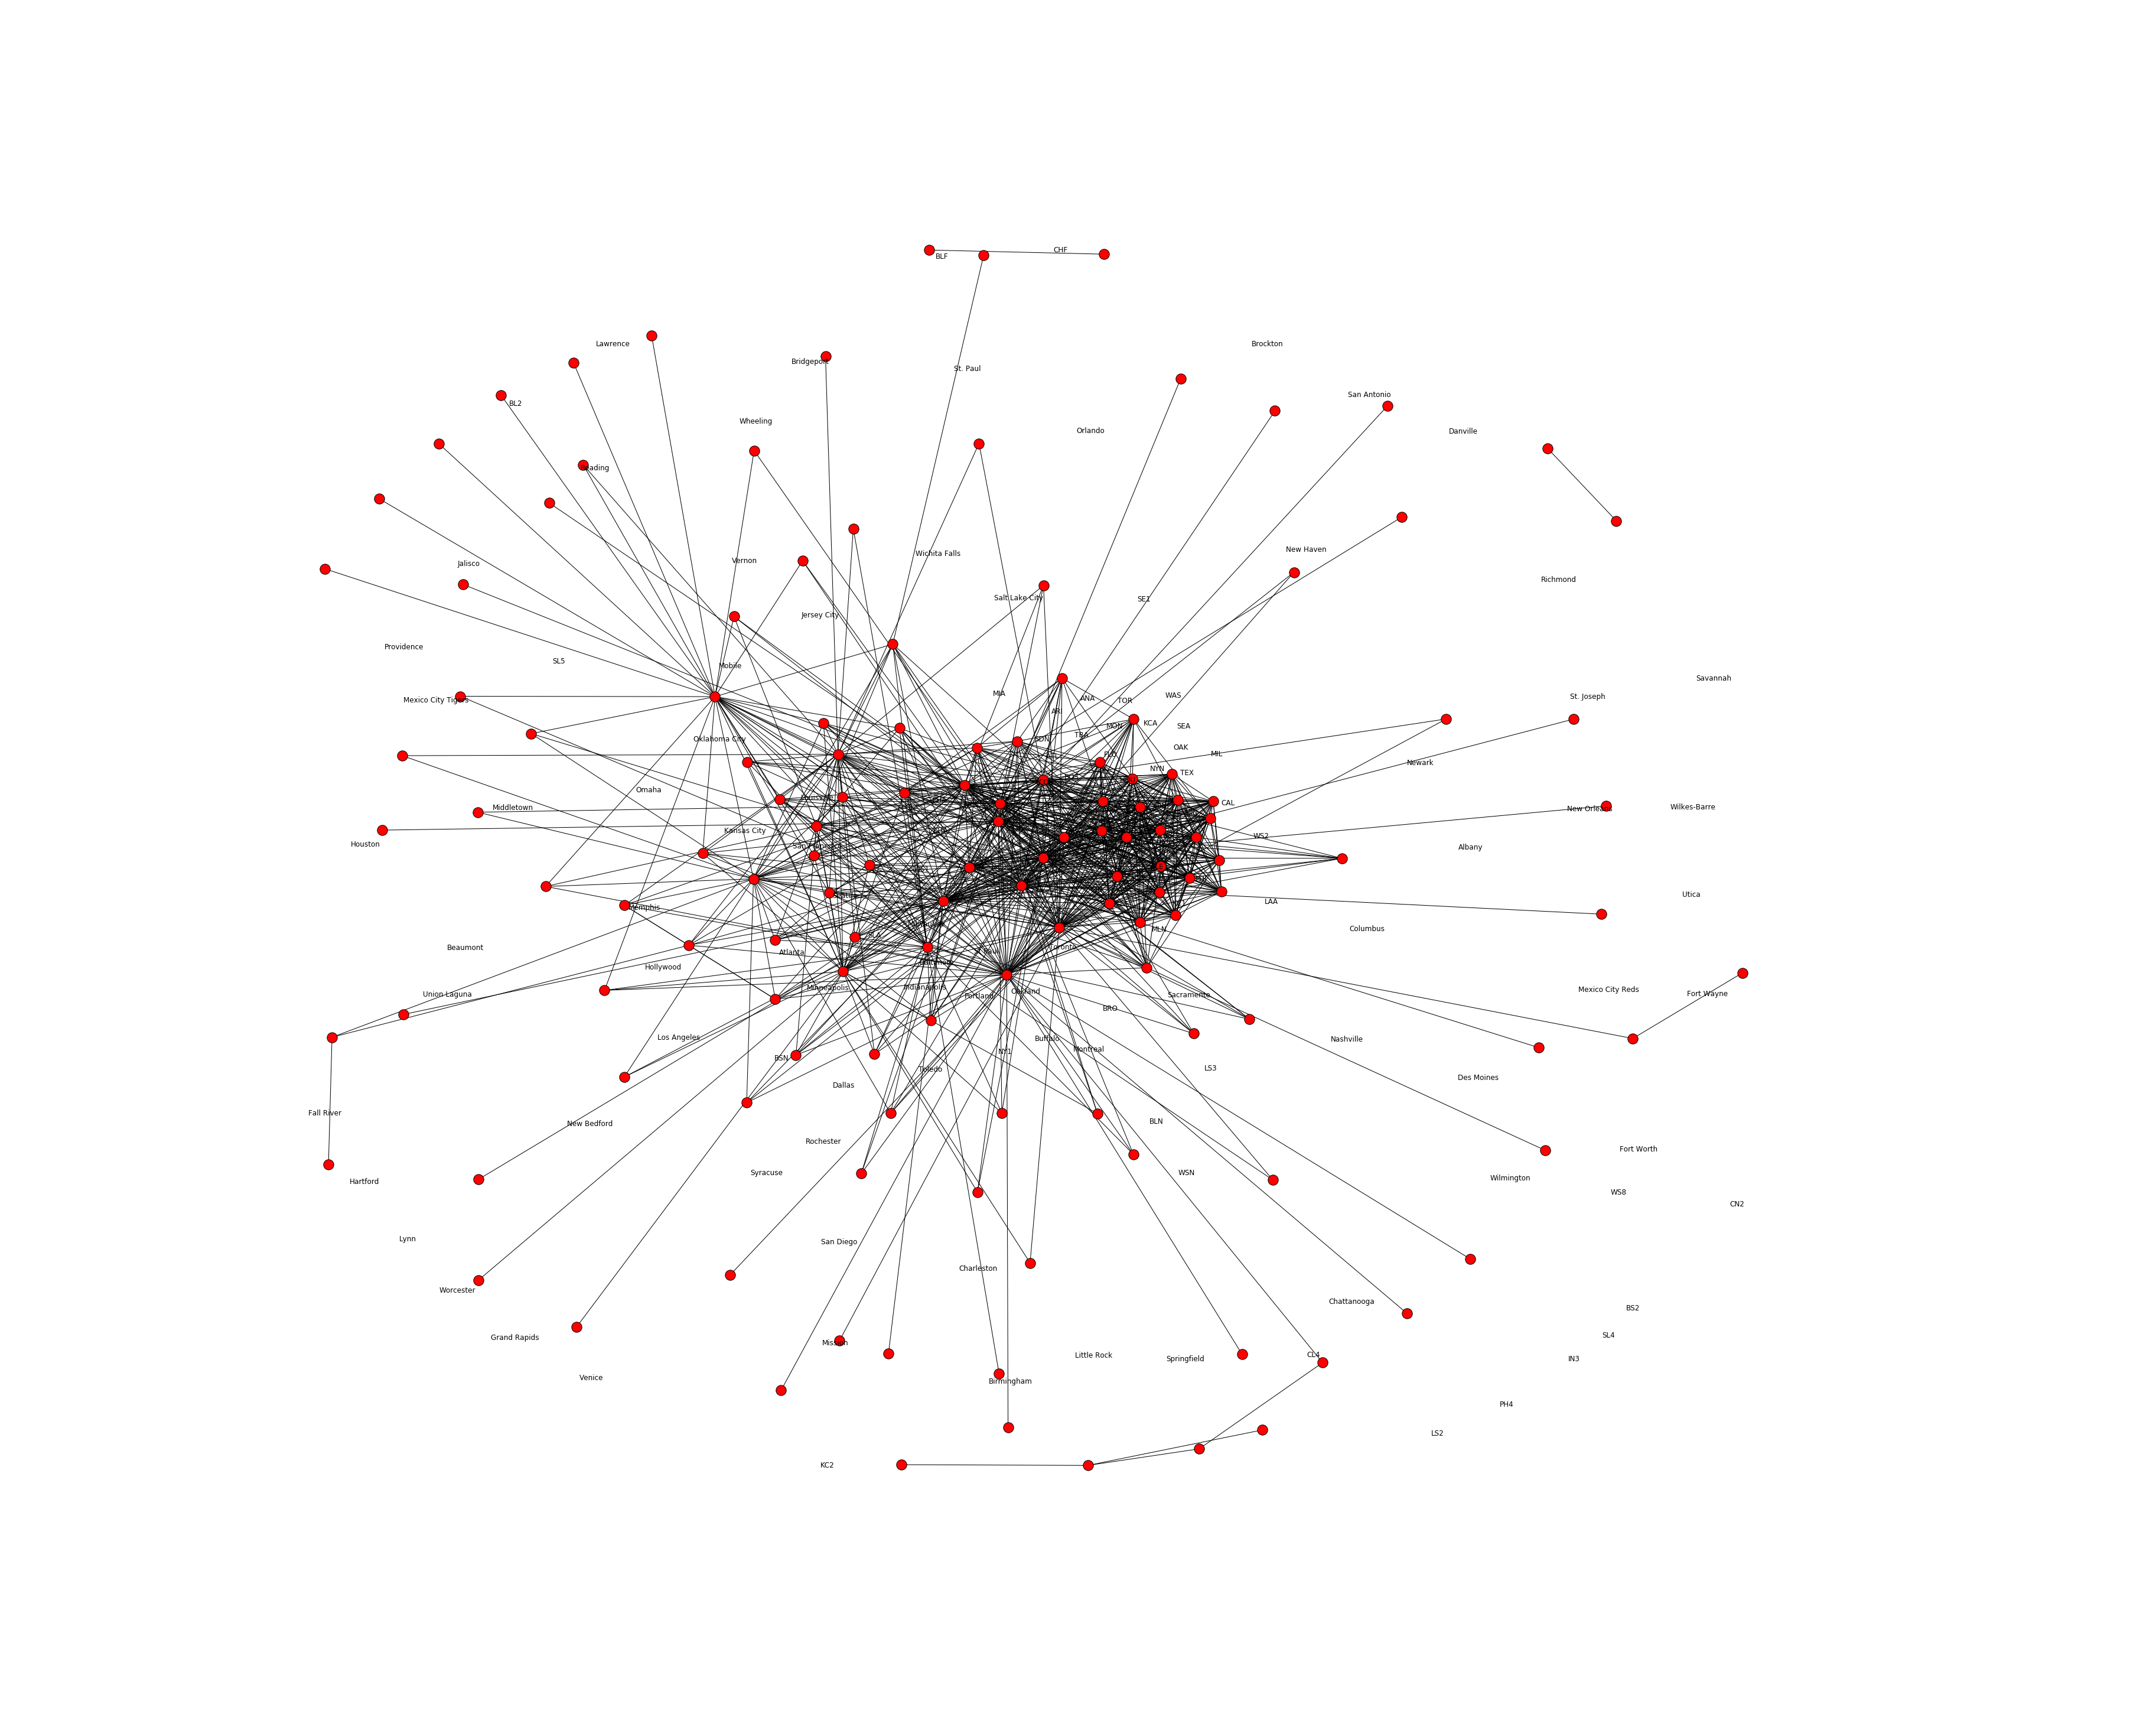

In [65]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 
fig = plt.figure (figsize=(50,40))
nx.draw(G,pos=nx.spring_layout(G))
nx.draw_networkx_labels(G,pos=nx.spring_layout(G))

In [3]:
teams = {}
teams["BOS"] = "Boston Red Sox";
teams["NYY"] = "New York Yankees"; 
teams["ARI"] = "Arizona Diamondbacks"; 
teams["ATL"] = "Atlanta Braves"; 
teams["BAL"] = "Baltimore Orioles"; 
teams["CHC"] = "Chicago Cubs"; 
teams["CHW"] = "Chicago White Sox"; 
teams["CIN"] = "Cincinnati Reds"; 
teams["CLE"] = "Cleveland Indians"; 
teams["COL"] = "Colorado Rockies"; 
teams["DET"] = "Detroit Tigers"; 
teams["FLA"] = "Florida Marlins"; 
teams["HOU"] = "Houston Astros"; 
teams["KCR"] = "Kansas City Royals"; 
teams["LAA"] = "Los Angeles Angels"; 
teams["LAD"] = "Los Angeles Dodgers"; 
teams["MIL"] = "Milwaukee Brewers"; 
teams["MIN"] = "Minnesota Twins"; 
teams["NYM"] = "New York Mets"; 
teams["OAK"] = "Oakland Athletics"; 
teams["PHI"] = "Philadelphia Phillies"; 
teams["PIT"] = "Pittsburgh Pirates"; 
teams["SDP"] = "San Diego Padres"; 
teams["SFG"] = "San Francisco Giants"; 
teams["SEA"] = "Seattle Mariners"; 
teams["STL"] = "St. Louis Cardinals"; 
teams["TBR"] = "Tampa Bay Rays"; 
teams["TEX"] = "Texas Rangers"; 
teams["TOR"] = "Toronto Blue Jays"; 
teams["WSN"] = "Washington Nationals";


In [37]:
df_playerid = df_playerid.dropna()

In [38]:
pd.merge(df_tran,df_playerid,on='player',how='inner')

,primary-date,time,approximate-indicator,secondary-date,approximate-indicator,transaction-ID,player,type,from-team,from-league,...,to-league,draft-type,draft-round,pick-number,info,LASTNAME,FIRSTNAME,PLAYERID,DAVENPORTCODE,MLBCODE
0,20030603,NaN,NaN,20030629.0,NaN,1,aardd001,Da,NaN,NaN,...,NL,NaN,1.0,22.0,NaN,Aardsma,David,45369,AARDSMA19811227A,430911.0
1,20111031,NaN,NaN,NaN,NaN,62995,aardd001,Fg,SEA,AL,...,NaN,NaN,NaN,NaN,NaN,Aardsma,David,45369,AARDSMA19811227A,430911.0
2,20120222,NaN,NaN,NaN,NaN,65095,aardd001,F,NaN,NaN,...,AL,NaN,NaN,NaN,NaN,Aardsma,David,45369,AARDSMA19811227A,430911.0
3,20050528,NaN,NaN,NaN,NaN,53155,aardd001,T,SFN,NL,...,NL,NaN,NaN,NaN,NaN,Aardsma,David,45369,AARDSMA19811227A,430911.0
4,20061116,NaN,NaN,NaN,NaN,53325,aardd001,T,CHN,NL,...,AL,NaN,NaN,NaN,NaN,Aardsma,David,45369,AARDSMA19811227A,430911.0
5,20080128,NaN,NaN,NaN,NaN,66822,aardd001,T,CHA,AL,...,AL,NaN,NaN,NaN,NaN,Aardsma,David,45369,AARDSMA19811227A,430911.0
6,20090120,NaN,NaN,NaN,NaN,56552,aardd001,T,BOS,AL,...,AL,NaN,NaN,NaN,NaN,Aardsma,David,45369,AARDSMA19811227A,430911.0
7,20130404,NaN,NaN,NaN,NaN,69994,aardd001,R,NYA,AL,...,NaN,NaN,NaN,NaN,NaN,Aardsma,David,45369,AARDSMA19811227A,430911.0
8,20130413,NaN,NaN,NaN,NaN,70055,aardd001,F,NaN,NaN,...,NL,NaN,NaN,NaN,NaN,Aardsma,David,45369,AARDSMA19811227A,430911.0
9,20130515,NaN,NaN,NaN,NaN,70167,aardd001,R,MIA,NL,...,NaN,NaN,NaN,NaN,NaN,Aardsma,David,45369,AARDSMA19811227A,430911.0
